Variations by Region
- Which countries/regions produced the highest scoring wines?
- What is the distribution of prices by countries/regions?
- Which countries/regions produced particular varieties of wines?
- Which countries/regions had the best value in terms of points/dollar?


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import numpy as np
import itertools
import seaborn as sns
import math
%matplotlib inline


# Load the data
wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=False) #, parse_dates=['contb_receipt_dt'], date_parser=d)

In [32]:
#import geopandas
#https://ramiro.org/notebook/geopandas-choropleth/
#https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
#import geoplot

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import bokeh

shapefile = 'ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'Three_Letter_Country_Code', 'geometry']

#gdf['geometry'] = gdf['geometry'].astype('list')
gdf.head()

print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

wine.shape

#Merge dataframes gdf and df_2016.
#merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'code')

        country Three_Letter_Country_Code  \
159  Antarctica                       ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


(129971, 14)

In [3]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Text(0.5, 1.0, 'Frequency of Point Ratings')

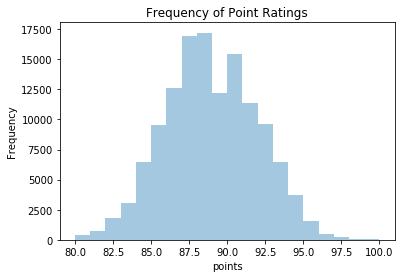

In [33]:
f = sns.distplot(wine.points, kde=False, bins=20)
f.set_ylabel("Frequency")
f.set_title('Frequency of Point Ratings')

In [5]:
# f = sns.distplot(wine.price, kde=False, bins=20)
# f.set_ylabel("Frequency")
# f.set_title('Frequency of Price')

In [34]:
#wine.head()

wine.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [35]:
gdf.country.unique()

array(['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan',
       'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas',
       'Falkland Islands', 'Norway', 'Greenland',
       'French Southern and Antarctic Lands', 'East Timor',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', 'Ivory Coast', 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso',
       'Central

In [36]:
#Create lookup table for country

countries_lk = pd.read_csv('Countries.csv', index_col=False) #, parse_dates=['contb_receipt_dt'], date_parser=d)
countries_lk.head()
#countries_lk.columns
#countries_lk['Country_Name'] = countries_lk['Country_Name'].str.replace('Republic of', '')

lookup_table = dict(zip(countries_lk.Country_Name,countries_lk.Continent_Name))
lookup_table_2 = dict(zip(countries_lk.Country_Name,countries_lk.Three_Letter_Country_Code))
#lookup_table

In [37]:
#wine.Three_Letter_Country_Code.unique().shape #42



countries = wine.country.unique()
countries

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
# wine= wine[wine.country == 'US']
# wine

In [10]:
gdf.Three_Letter_Country_Code.unique()

array(['FJI', 'TZA', 'SAH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN',
       'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM',
       'RUS', 'BHS', 'FLK', 'NOR', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO',
       'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC',
       'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'FRA', 'ECU',
       'PRI', 'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT',
       'BEN', 'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB',
       'LBR', 'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI',
       'MOZ', 'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSX', 'GMB',
       'TUN', 'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT',
       'KHM', 'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND',
       'BGD', 'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN',
       'SYR', 'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA',
       'ROU', 'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB',
       'HRV', 'CHE',

In [58]:
#What is the distribution of prices by countries/regions?

#https://datahub.io/JohnSnowLabs/country-and-continent-codes-list

#Create a blank dictionary of continents
countries = wine.country.unique()
keys = countries
continents_dict = dict(zip(keys, [None]*len(keys)))
country_codes = dict(zip(keys, [None]*len(keys)))

for item in keys:
    for key in lookup_table.keys():
        #print(key)
        #print(item)
        
        #clean up a few
        if str(item) == 'US':
            country_codes[item] = 'USA'
        if str(item) == 'England':
            country_codes[item] = 'GBR'
        if 'Guyana' in str('item'):
            country_codes[item] ='ZZZ' #get rid of french guinea
        elif str(item) in str(key):
            continents_dict[item] = lookup_table[key]
            country_codes[item] = lookup_table_2[key]
    else:
        pass
continents_dict

#Clean up the ones that didn't automatically work
continents_dict['US'] = 'North America'
continents_dict['England'] = 'Europe'
continents_dict['New Zealand'] = 'Australia'
continents_dict['Australia'] = 'Australia'

continents_dict

wine['continent'] = wine['country'].map(continents_dict) 
wine['Three_Letter_Country_Code'] = wine['country'].map(country_codes)
wine.head(100)

wine[wine.country =='Austria']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,continent,Three_Letter_Country_Code,expected points,value,log_price
54311,54311,Austria,"This wines arrives on tiptoe, citrus-scented a...",Gaisberg Reserve,96,28.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,Europe,AUT,88.471926,7.528074,1.447158
109431,109431,Austria,"Beautifully lifted, almost sublimated apple an...",Heiligenstein Reserve Lyra,96,35.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Bründlmayer 2013 Heiligenstein Reserve Lyra Ri...,Riesling,Bründlmayer,Europe,AUT,89.107465,6.892535,1.544068
119666,119666,Austria,Apple and passion fruit are the aromatic top n...,Noble Reserve Trockenbeerenauslese,95,25.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Kracher NV Noble Reserve Trockenbeerenauslese ...,Austrian white blend,Kracher,Europe,AUT,88.149153,6.850847,1.397940
88682,88682,Austria,A little air is all that is needed to shake th...,Vm Berg,94,18.0,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Eichinger 2014 Vm Berg Riesling (Kamptal),Riesling,Eichinger,Europe,AUT,87.213535,6.786465,1.255273
119657,119657,Austria,"Golden liquid, a piercing nose, utter musk: th...",Bienenfeld Beerenauslese,96,38.0,Niederösterreich,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Salomon-Undhof 2009 Bienenfeld Beerenauslese R...,Riesling,Salomon-Undhof,Europe,AUT,89.341688,6.658312,1.579784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128981,128981,Austria,"This Riesling is light, delicate and perfumed,...",Zöbinger Heiligenstein Erste Lage,93,NaN,Kamptal,NaN,NaN,Roger Voss,@vossroger,Hirsch 2009 Zöbinger Heiligenstein Erste Lage ...,Riesling,Hirsch,Europe,AUT,NaN,NaN,NaN
128987,128987,Austria,With its richness and complex wood and spice c...,Zieregg Grosse Lage,93,NaN,Südsteiermark,NaN,NaN,Roger Voss,@vossroger,Manfred Tement 2009 Zieregg Grosse Lage Sauvig...,Sauvignon Blanc,Manfred Tement,Europe,AUT,NaN,NaN,NaN
129007,129007,Austria,"A rich and creamy wine, this is full of the ri...",Loam,92,NaN,Niederösterreich,NaN,NaN,Roger Voss,@vossroger,Kurt Angerer 2010 Loam Grüner Veltliner (Niede...,Grüner Veltliner,Kurt Angerer,Europe,AUT,NaN,NaN,NaN
129241,129241,Austria,Nervy bundles of flavor present themselves on ...,Kogelberg Reserve,93,NaN,Kamptal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Hiedler 2014 Kogelberg Reserve Riesling (Kamptal),Riesling,Hiedler,Europe,AUT,NaN,NaN,NaN


In [40]:
#Calculate values
wine['expected points'] = wine['price'].apply(lambda x: 78.98142 + 6.55803*math.log10(x))
wine['value'] =  wine['points'] -wine['expected points']
wine['log_price'] = wine['price'].apply(lambda x: math.log10(x))

#Why all negative?
# wine.head(
# wine.value.max()

In [13]:
#list(top_values['points'])[1]

NameError: name 'top_values' is not defined

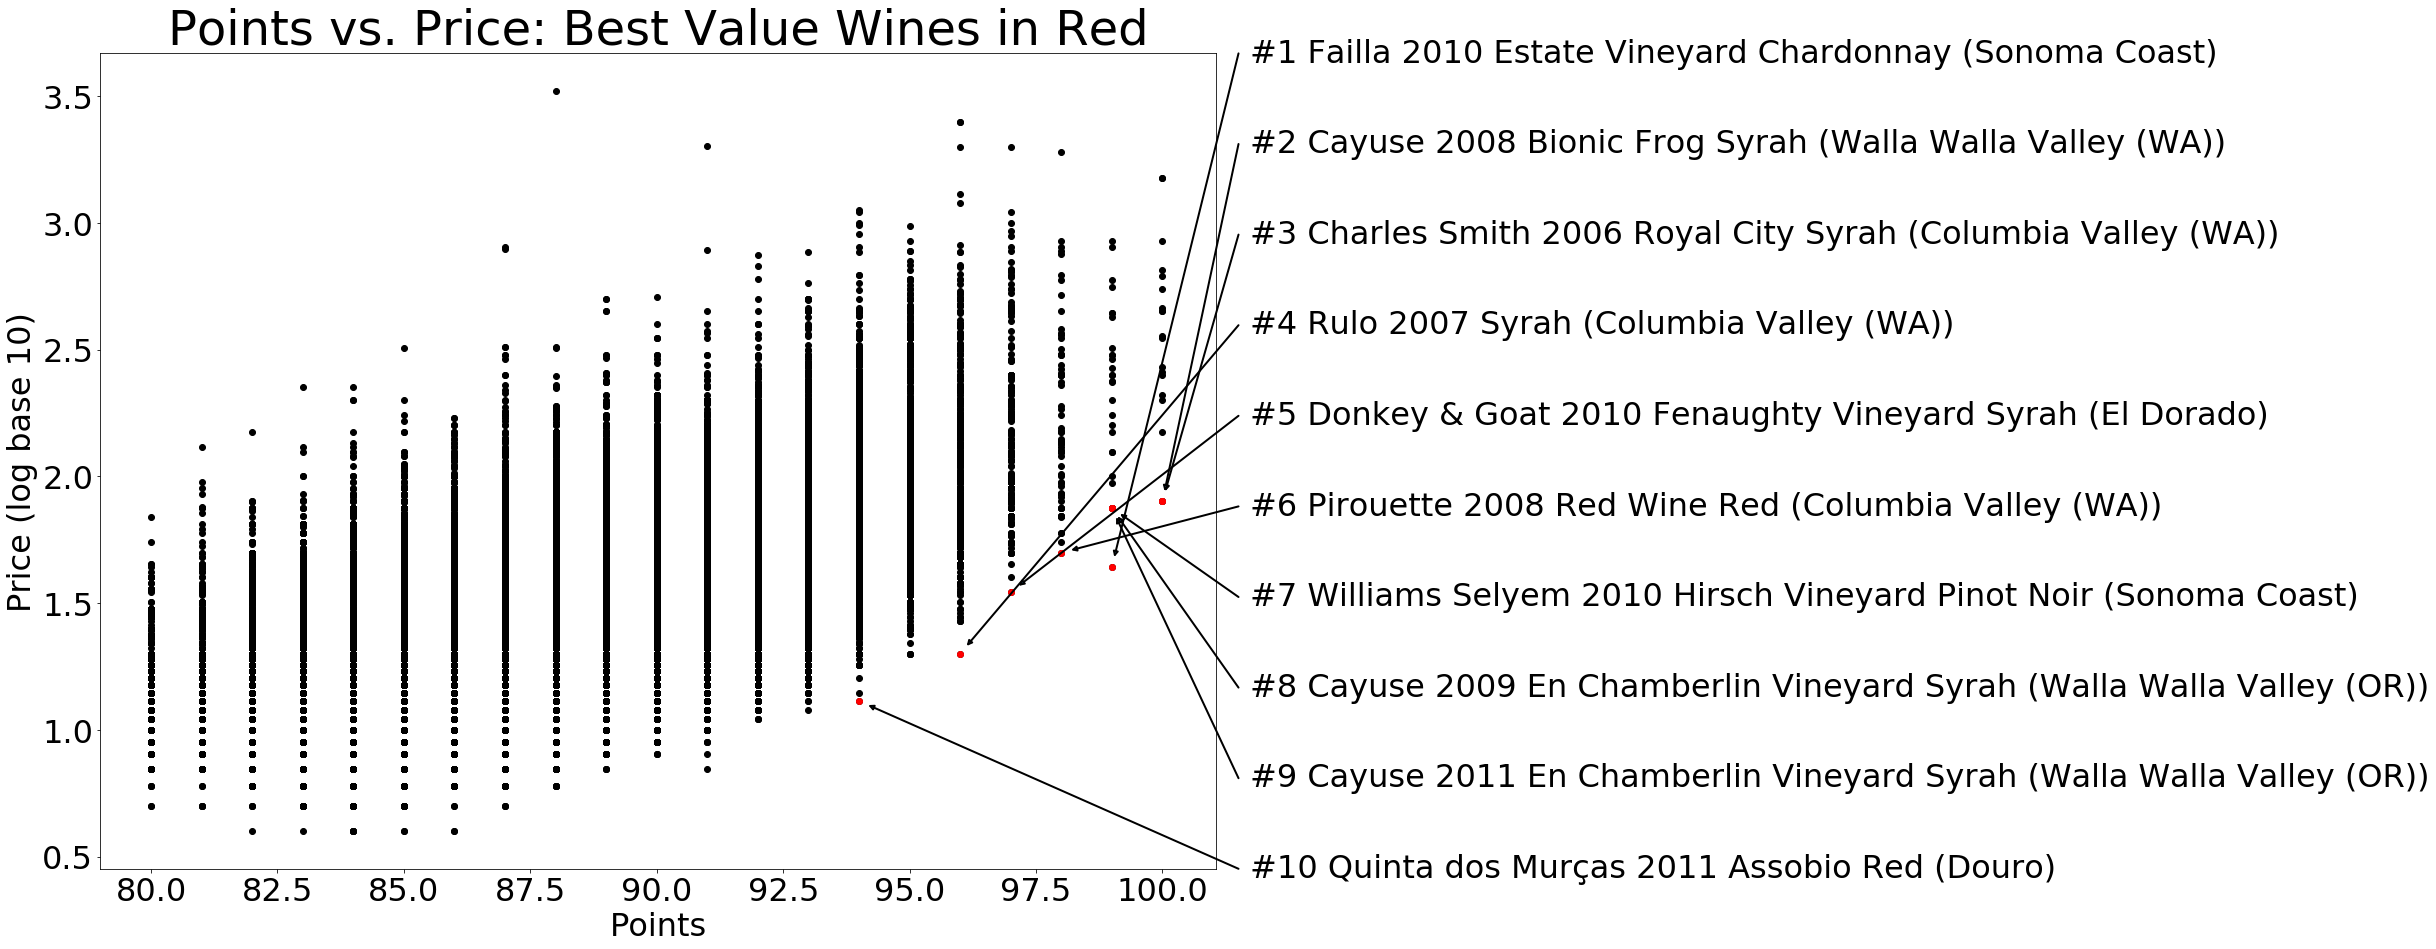

In [59]:
#wine.shape

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

plt.xlabel('Points', fontsize=32)
plt.ylabel('Price (log base 10)', fontsize=32)
plt.title('Points vs. Price: Best Value Wines in Red', fontsize=48)
ax.tick_params(axis='both', which='major', labelsize=32)

top_values = wine
top_values.sort_values(by='value', ascending=False, inplace=True)
top_values = pd.DataFrame(top_values.head(10))[::-1]
top_values.head(10)


ax.scatter(wine.points, wine.log_price, color='k')
ax.scatter(top_values.points, top_values.log_price, color='r', label = top_values.title)

# for i, txt in enumerate(top_values.title):
#     ax.annotate(txt, (top_values[i], top_values[i]))
    
# for i,type in enumerate(top_values.title):
#     x = list(top_values['points'])[i]
#     y = list(top_values['log_price'])[i]
#     plt.scatter(x, y, marker='x', color='red')
#     plt.text(x-0.1, y-0.1, type, fontsize=20)
# annotations at the side (ordered by B values)

A = top_values['points']
B = top_values['log_price']

x0,x1=ax.get_xlim()
y0,y1=ax.get_ylim()

for ii, ind in enumerate(top_values.title):
    x = list(top_values['points'])[ii]
    y = list(top_values['log_price'])[ii]
    xPos = x1 + .02 * (x1 - x0)
    yPos = y0 + ii * (y1 - y0)/(len(B) - 1)
    ax.annotate('',#label,
          xy=(x, y), xycoords='data',
          xytext=(xPos, yPos), textcoords='data',
          arrowprops=dict(
                          connectionstyle="arc3,rad=0.",
                          shrinkA=0, shrinkB=10,
                          arrowstyle= '-|>', ls= '-', linewidth=2
                          ),
          va='bottom', ha='left', zorder=19
          )
    ax.text(xPos + .01 * (x1 - x0), yPos,
            "#"+str(10-ii)+" "+ind,
            transform=ax.transData, va='center', fontsize=32)
plt.show()



In [60]:
# wine['geometry_str'] = wine.geometry.to_string()

#wine.head()

#type(wine.geometry[0])

#wine['geo_list'] = wine['geometry']

#wine.head()

#from shapely.geometry import Point, mapping, shape

#wine = wine[~wine.isin([np.nan, np.inf, -np.inf]).any(1)]

#wine['geometry'] = wine['geometry'].apply(list)
#wine.head()

#get rid of hte polygon
#wine = wine.drop(columns=['geometry'])
#wine = wine.drop(columns=['country_y'])
#wine.head()

import math


## Which countries/regions produced the highest scoring wines?
total_pts_by_country = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['points'].sum())
counts_by_country = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['points'].count())
maxes = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['points'].max())
prices_sum = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['price'].sum())
prices_count = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['price'].count())
value_sum = pd.DataFrame(wine.groupby(['country','Three_Letter_Country_Code'])['value'].sum())
counts_by_country.head()

country_scores = total_pts_by_country.merge(counts_by_country, on=['country','Three_Letter_Country_Code'])

country_scores.head()
country_scores.columns = ['total_pts', 'counts']
country_scores['average'] = country_scores['total_pts']/country_scores['counts']
country_scores.sort_values('average', ascending=True, inplace=True)

country_scores = country_scores.merge(maxes, on=['country','Three_Letter_Country_Code'])

country_scores = pd.DataFrame(country_scores)
country_scores.reset_index(inplace=True)
country_scores.columns = ['country','Three_Letter_Country_Code','total_pts','counts','average','max points']

country_scores.head()

country_scores = country_scores.merge(prices_sum, on=['country','Three_Letter_Country_Code'])
country_scores.columns = ['country','Three_Letter_Country_Code','total_pts','counts','average','max points','price']
country_scores.reset_index(drop = True) #inplace=True)



country_scores = country_scores.merge(prices_count, on=['country','Three_Letter_Country_Code'])
country_scores.reset_index(drop = True) #inplace=True)

#country_scores.drop(columns=['level_0', 'index'])
country_scores.head()
country_scores.columns = ['country','Three_Letter_Country_Code','total_pts','counts','average','max points','sum_price','price ct']
country_scores.reset_index(inplace=True)

country_scores['counts_log'] = country_scores['counts'].apply(lambda x: math.log(x))
#country_scores['expected_points'] = country_scores['sum_price'].apply(lambda x: math.log(x+1)) #add 1


# expected points = 78.98142 + 6.55803 * log(price)
# Value = actual points - expected points
country_scores['average_price'] = country_scores['sum_price']/country_scores['price ct']
#country_scores['value'] = country_scores['total_pts']/(country_scores['price_log'])
    
#country_scores['price_log'] = country_scores['sum_price'].apply(lambda x: math.log(x))
country_scores = country_scores.merge(value_sum, on=['country','Three_Letter_Country_Code'])
country_scores.head()

country_scores['average_value'] = country_scores['value']/country_scores['price ct']



# #country_scores.reset_index(inplace=True)
# country_scores.index
# country_scores.columns
# # country_scores.head()

wine_avg = country_scores
wine_avg = wine_avg[~wine_avg.isin([np.nan, np.inf, -np.inf]).any(1)]
# wine_avg.head()


country_scores.head()
#plt.table(country_scores.head(100).sort_values('value'))

,index,country,Three_Letter_Country_Code,total_pts,counts,average,max points,sum_price,price ct,counts_log,average_price,value,average_value
0,0,Peru,PER,1337,16,83.562500,86,289.0,16,2.772589,18.062500,-52.674202,-3.292138
1,1,Egypt,EGY,84,1,84.000000,84,0.0,0,0.000000,NaN,0.000000,NaN
2,2,Ukraine,UKR,1177,14,84.071429,88,129.0,14,2.639057,9.214286,-16.181721,-1.155837
3,3,Brazil,BRA,4403,52,84.673077,89,1117.0,47,3.951244,23.765957,-144.708883,-3.078912
4,4,Mexico,MEX,5968,70,85.257143,92,1875.0,70,4.248495,26.785714,-186.371209,-2.662446


In [61]:
country_count =  pd.DataFrame(wine.groupby(['country'])['price'].count())
country_count = country_count.sort_values('price')[::-1].head(10)
country_count.reset_index(inplace=True)
country_count.columns = ['country','count']
country_count

,country,count
0,US,54265
1,France,17776
2,Italy,16914
3,Spain,6573
4,Portugal,4875
5,Chile,4416
6,Argentina,3756
7,Austria,2799
8,Australia,2294
9,Germany,2120


In [62]:
#pivot the data



variety_count =  pd.DataFrame(wine.groupby(['variety'])['price'].count())
variety_count = variety_count.sort_values('price')[::-1].head(10)
variety_count.reset_index(inplace=True)
variety_count.columns = ['country','count']

common_wines = list(variety_count.country)
#common_wines

common_wine_df = pd.DataFrame()

for wine_type in common_wines:
    common_wine_df = common_wine_df.append(wine[wine.variety ==wine_type])

common_wine_df.head()
common_wine_df = common_wine_df.merge(country_count, on='country')

data = pd.DataFrame(common_wine_df[['country','variety','points']])

#data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
#data.points.unique()

data['country'] = data['country'].astype(str)
data['variety'] = data['variety'].astype(str)
data.dtypes
data.set_index(['country','variety'])

#data
#data = np.array(data)
variety = pd.pivot_table(common_wine_df, values = 'points', index=['country'], columns=['variety'], aggfunc='count',fill_value=0)
variety_array = np.array(variety)
variety_array = np.log(variety_array+1)
#variety[variety==0] = 1
#variety = math.log(variety)
#variety_array = variety_array[variety_array > 0]
#variety_array = math.log(variety_array)

#table = pd.pivot_table(df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum, fill_value=0)

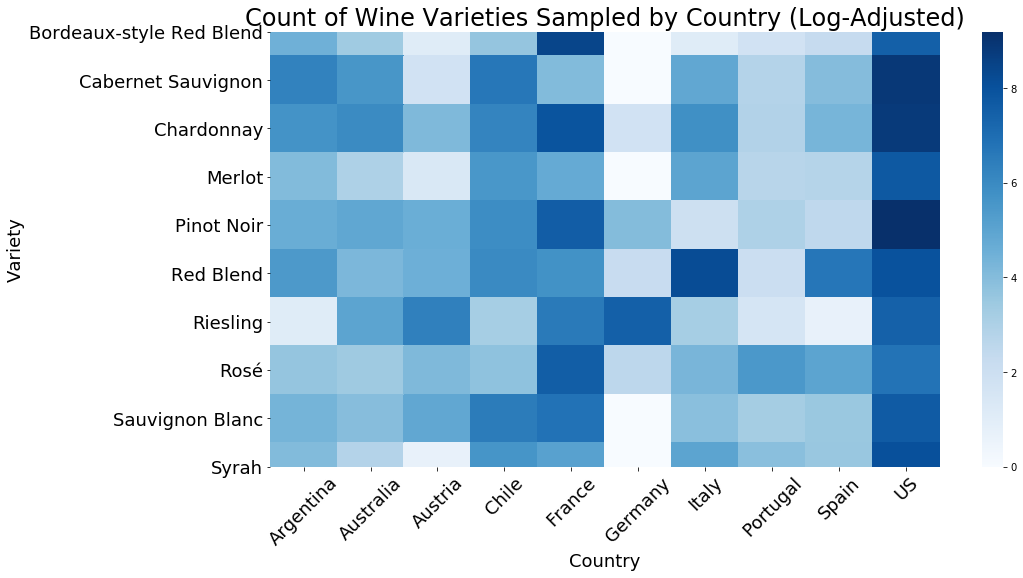

In [19]:

##adapt the histogram to my data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create some random data; replace that by your actual dataset
#data = pd.DataFrame(np.random.rand(11, 5), columns=['A', 'B', 'C', 'D', 'E'], index = range(2000, 2011, 1))


fig, ax= plt.subplots(figsize=(15,8))

# plot heatmap
ax = sns.heatmap(variety_array.T,xticklabels=list(variety.index), yticklabels =variety.columns,cmap="Blues")
plt.title('Count of Wines Sampled')

plt.xlabel('Country', fontsize=18)
plt.ylabel('Variety', fontsize=18)
plt.title('Count of Wine Varieties Sampled by Country (Log-Adjusted)', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='x',rotation=45)

# # turn the axis label
# for item in ax.get_yticklabels():
#     item.set_rotation(0)

# for item in ax.get_xticklabels():
#     item.set_rotation(90)

# save figure
#plt.savefig('seabornPandas.png', dpi=100)
plt.show()

In [45]:
#wine.country.unique()
gdf.country.unique()
countries_lk.head()
wine_avg = gdf.merge(wine_avg,on = 'Three_Letter_Country_Code',indicator=False)

In [ ]:
# wine.shape

In [ ]:
# wine.columns
# wine.geometry[0] #WHAT THE WHAT!!!!

In [ ]:

# #wine.head()
# wine.columns
# #wine.shape


In [ ]:
# import plotly.express as px

# # gapminder = px.data.gapminder().query("year==2007")
# # fig = px.choropleth(gapminder, locations="iso_alpha",
# #                     color="lifeExp", # lifeExp is a column of gapminder
# #                     hover_name="country", # column to add to hover information
# #                     color_continuous_scale=px.colors.sequential.Plasma)
# # fig.show()

# #gapminder = px.data.gapminder().query("year==2007")
# #winedata = px.data.wine
# fig = px.choropleth(wine, locations="geometry",
#                     color="points", # lifeExp is a column of gapminder
#                     #hover_name="country_x", # column to add to hover information
#                     color_continuous_scale=px.colors.sequential.Plasma)
# fig.show()

In [46]:
# from bokeh.io import output_notebook, show, output_file, save
# from bokeh.plotting import figure
# from bokeh.models.annotations import Title
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
# from bokeh.palettes import brewer
# from math import pi
# import pandas as pd
# from bokeh.plotting import figure, show, output_file
# import bokeh.plotting as bop
# bop.output_notebook()
# from bokeh.models.annotations import Title
# from datetime import date
# from datetime import datetime

# import json
# #Read data to json.
# merged_json = json.loads(wine.to_json())
# #Convert to String like object.
# json_data = json.dumps(merged_json)

# with open('data.json', 'w') as f:
#     json.dump(merged_json, f)

import json
wine_avg.head()
#merged_json = json.loads(wine.to_json())
json_data = wine_avg.to_json()
# with open('data.json', 'w') as f:
#       json.dump(json_data, f)

In [47]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

In [ ]:
# from bokeh.io import output_notebook, show, output_file
# from bokeh.plotting import figure
# from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
# from bokeh.palettes import brewer

# #Input GeoJSON source that contains features for plotting.
# geosource = GeoJSONDataSource(geojson = json_data)
# #Define a sequential multi-hue color palette.
# palette = brewer['YlGnBu'][8]
# #Reverse color order so that dark blue is highest obesity.
# palette = palette[::-1]
# #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
# color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
# #Define custom tick labels for color bar.
# tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
# #Create color bar. 
# color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
# border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
# #Create figure object.
# p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None
# #Add patch renderer to figure. 
# p.patches('xs','ys', source = geosource,fill_color = {'field' :'points', 'transform' : color_mapper},
#           line_color = 'black', line_width = 0.25, fill_alpha = 1)
# #Specify figure layout.
# p.add_layout(color_bar, 'below')
# #Display figure inline in Jupyter Notebook.
# output_notebook()
# #Display figure.
# show(p)

In [ ]:
#state.head()

# with open('data.json', 'w') as f:
#     json.dump(state_geo, f)

In [ ]:

# import folium
# import pandas as pd


# url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# state_geo = f'{url}/us-states.json'
# state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# state_data = pd.read_csv(state_unemployment)

# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=state_geo,
#     name='choropleth',
#     data=state_data,
#     columns=['State', 'Unemployment'],
#     key_on='feature.id',
#     fill_color='YlGn',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Unemployment Rate (%)'
# ).add_to(m)

# folium.LayerControl().add_to(m)

# m

In [ ]:
#help(folium.Choropleth)

In [63]:

#plot the maximums 

import folium
import pandas as pd


# #url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# #state_geo = f'{url}/us-states.json'
# #state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# #state_data = pd.read_csv(state_unemployment)

# #state

m = folium.Map(location=[48, -102], zoom_start=2)

folium.Choropleth(
    geo_data=json_data,
    name='Average Wine Points',
    data=wine_avg,
    columns=['Three_Letter_Country_Code','average'],
    key_on='feature.properties.Three_Letter_Country_Code',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Wine Points'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [66]:
#plot the maximums 

import folium
import pandas as pd


# #url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# #state_geo = f'{url}/us-states.json'
# #state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# #state_data = pd.read_csv(state_unemployment)

# #state

m = folium.Map(location=[48, -102], zoom_start=2)

folium.Choropleth(
    geo_data=json_data,
    #name='choropleth',
    data=wine_avg,
    columns=['Three_Letter_Country_Code','max points'],
    key_on='feature.properties.Three_Letter_Country_Code',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Maximum Wine Points'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [64]:
#plot the average_price

import folium
import pandas as pd


# #url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# #state_geo = f'{url}/us-states.json'
# #state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# #state_data = pd.read_csv(state_unemployment)

# #state

m = folium.Map(location=[48, -102], zoom_start=2)

folium.Choropleth(
    geo_data=json_data,
    #name='choropleth',
    data=wine_avg,
    columns=['Three_Letter_Country_Code','average_price'],
    key_on='feature.properties.Three_Letter_Country_Code',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Price'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [65]:
#plot the maximums 

import folium
import pandas as pd


# #url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# #state_geo = f'{url}/us-states.json'
# #state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# #state_data = pd.read_csv(state_unemployment)

# #state

m = folium.Map(location=[48, -102], zoom_start=2)

folium.Choropleth(
    geo_data=json_data,
    #name='choropleth',
    data=wine_avg,
    columns=['Three_Letter_Country_Code','counts_log'],
    key_on='feature.properties.Three_Letter_Country_Code',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='log of counts'
).add_to(m)

folium.LayerControl().add_to(m)

m


In [50]:
#plot the maximums 

import folium
import pandas as pd


# #url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
# #state_geo = f'{url}/us-states.json'
# #state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
# #state_data = pd.read_csv(state_unemployment)

# #state

m = folium.Map(location=[48, -102], zoom_start=2)

folium.Choropleth(
    geo_data=json_data,
    #name='choropleth',
    data=wine_avg,
    columns=['Three_Letter_Country_Code','average_value'],
    key_on='feature.properties.Three_Letter_Country_Code',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

folium.LayerControl().add_to(m)

m

(84, 92)

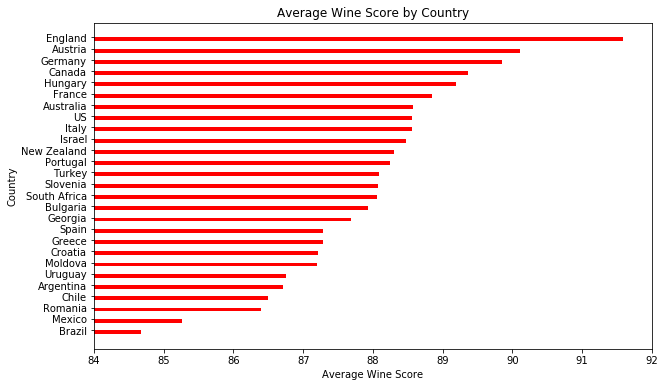

In [51]:
#Plot scores by country

## Which countries/regions produced the highest scoring wines?
total_pts_by_country = pd.DataFrame(wine.groupby(['country','continent'])['points'].sum())
counts_by_country = pd.DataFrame(wine.groupby(['country','continent'])['points'].count())

country_scores = total_pts_by_country.merge(counts_by_country, on='country')
country_scores.columns = ['total_pts', 'counts']
country_scores['average'] = country_scores['total_pts']/country_scores['counts']
country_scores.sort_values('average', ascending=True, inplace=True)
large_country_scores = country_scores[country_scores['counts']>50]
large_country_scores.shape


N =27
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
#plt.xticks(rotation=90)
ax.barh(ind, large_country_scores['average'], width, color='r') 

#Set the size
fig.set_size_inches(10, 6)

#Y labeling
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(large_country_scores.index)

#
plt.title('Average Wine Score by Country')
ax.set_xlabel('Average Wine Score')
ax.set_ylabel('Country')
plt.xlim(84,92)
#plt.tight_layout()

In [ ]:
wine.head()
wine.columns

(84, 89)

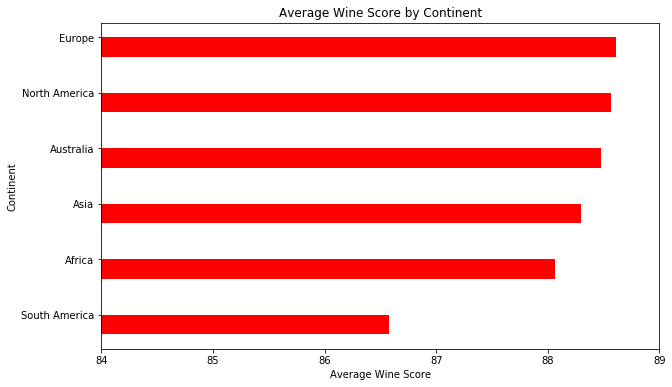

In [52]:
##SCORES BY CONTINENT

total_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['points'].sum())
max_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['points'].max())
min_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['points'].min())
counts_by_continent = pd.DataFrame(wine.groupby(['continent'])['points'].count())


continent_scores = total_pts_by_continent.merge(counts_by_continent, on='continent')
continent_scores.columns = ['total_pts', 'counts']
continent_scores['average'] = continent_scores['total_pts']/continent_scores['counts']
continent_scores.sort_values('average', ascending=True, inplace=True)
continent_scores.shape

N =6
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
#plt.xticks(rotation=90)
ax.barh(ind, continent_scores['average'],width,color='r') 

#Set the size
fig.set_size_inches(10, 6)

#Y labeling
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(continent_scores.index)

#
plt.title('Average Wine Score by Continent')
ax.set_xlabel('Average Wine Score')
ax.set_ylabel('Continent')
plt.xlim(84,89)
#plt.tight_layout()

Text(0, 0.5, 'Continent')

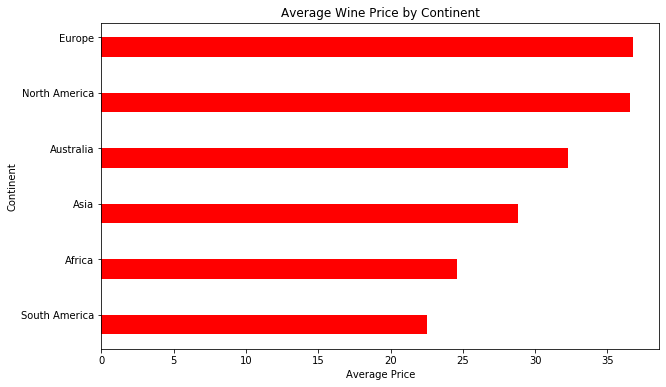

In [53]:
##PRICES BY CONTINENT

total_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['price'].sum())
max_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['price'].max())
min_pts_by_continent = pd.DataFrame(wine.groupby(['continent'])['price'].min())
counts_by_continent = pd.DataFrame(wine.groupby(['continent'])['price'].count())

continent_scores = total_pts_by_continent.merge(counts_by_continent, on='continent')
continent_scores.columns = ['price', 'counts']
continent_scores['average'] = continent_scores['price']/continent_scores['counts']
continent_scores.sort_values('average', ascending=True, inplace=True)
continent_scores.shape

N =6
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()
#plt.xticks(rotation=90)
ax.barh(ind, continent_scores['average'],width,color='r') 

#Set the size
fig.set_size_inches(10, 6)

#Y labeling
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(continent_scores.index)

#
plt.title('Average Wine Price by Continent')
ax.set_xlabel('Average Price')
ax.set_ylabel('Continent')
#plt.xlim(84,89)
#plt.tight_layout()

Text(0.5, 1.0, 'Wine Quality by Continent')

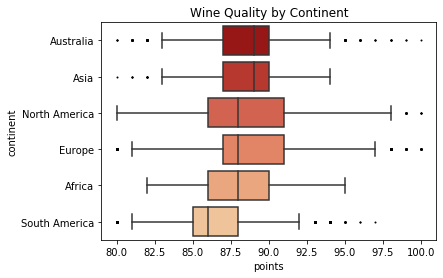

In [54]:
##SCORES BY CONTINENT -- BOXPLOT EDITION 

import numpy as np
import itertools
import seaborn as sns


flierprops = dict(marker='o', markersize=1,#markerfacecolor='r', 
                  linestyle='none', markeredgecolor='k')

#data = np.random.randn(25, 4)
#wine_points = pd.DataFrame(wine, columns=['continent','points'])
#wine_points['median'] = wine_points.groupby(['continent'])['points'].median()
#wine_points.sort_values('median', inplace='True')
#wine_points
my_order = wine.groupby(['continent'])['points'].median().sort_values().iloc[::-1] #.index
my_order
sns.boxplot(y = wine.continent, x=wine.points, order = my_order.index,palette=sns.color_palette("OrRd_r",8), #"husl"),
           showfliers=True, flierprops = flierprops).set_title('Wine Quality by Continent')
#sns.stripplot(x=wine.points, y=wine.continent,
#               jitter=True, size=1, color=".3", linewidth=10, order = my_order.index)


##NA and Europe had a great variety of qualities of wine. Australia and Asia surprisingly beat out the quality of the wine
#of europe.

In [ ]:
wine['country'].unique().size

Text(0.5, 1.0, 'Wine Quality by Country, Ordered by Maximum')

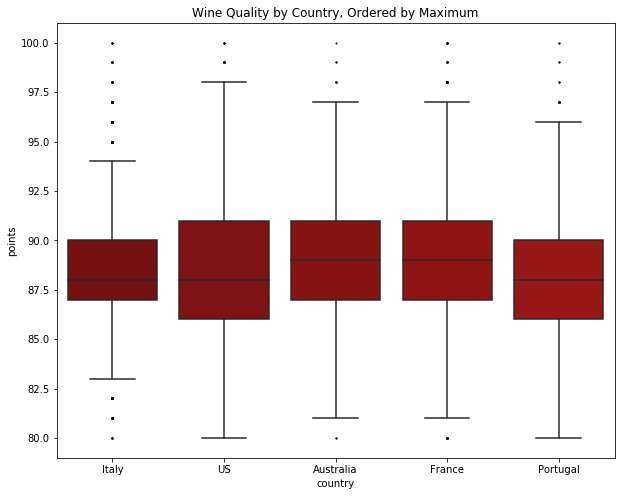

In [55]:
##SCORES BY CONTINENT -- BOXPLOT EDITION

wine=wine

my_order = wine.groupby(['country'])['points'].max().sort_values().iloc[::-1].head(5) #.index
countries_for_chart = my_order.head(n=5)
countries_for_chart
#wine=wine.head(10)

best_wine = pd.DataFrame()

for country in countries_for_chart.index:
    best_wine = best_wine.append(wine[wine.country ==country])

    
flierprops = dict(marker='o', markersize=1,#markerfacecolor='r', 
                  linestyle='none', markeredgecolor='k')
best_wine.country.unique()
# temp.reset_index(inplace=True)
# temp.country.unique()

fig, axs= plt.subplots(figsize=(10,8))

sns.boxplot(y=best_wine.points,x= best_wine.country,  order = my_order.index,palette=sns.color_palette("OrRd_r",44),
           showfliers=True, flierprops = flierprops).set_title('Wine Quality by Country, Ordered by Maximum')

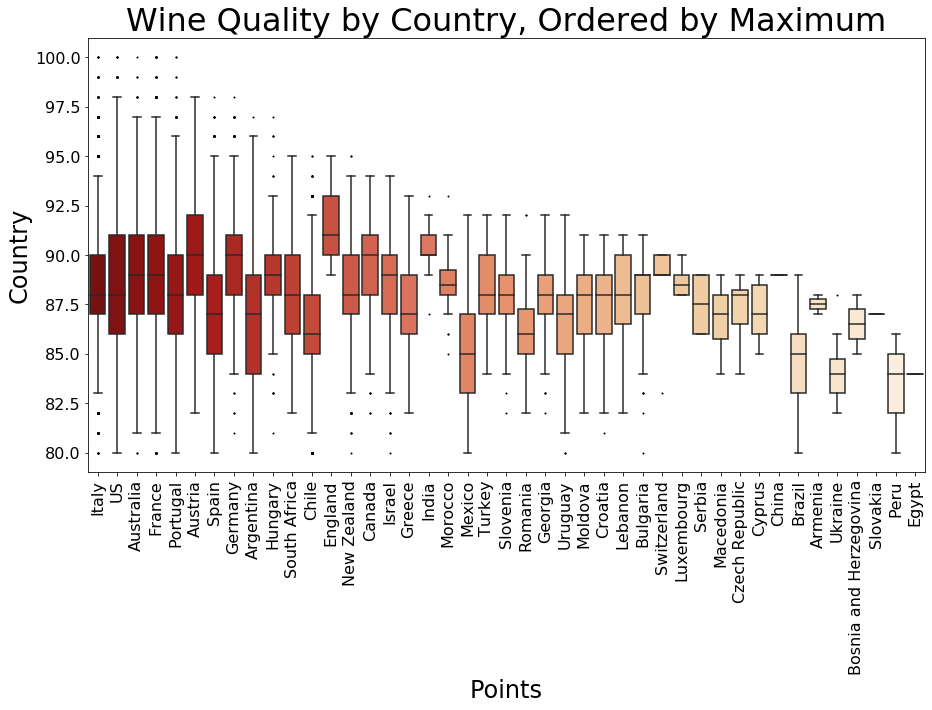

In [56]:
##SCORES BY CONTINENT -- BOXPLOT EDITION


#my_order = wine.groupby(['country'])['points'].median().sort_values().iloc[::-1] #.index
#my_order

my_order2 = wine.groupby(['country'])['points'].max().sort_values().iloc[::-1] #.index
#my_order2

fig, ax = plt.subplots(1,1, figsize=(15,8))

flierprops = dict(marker='o', markersize=1,#markerfacecolor='r', 
                  linestyle='none', markeredgecolor='k')

sns.boxplot(x = wine.country, y=wine.points, order = my_order2.index, palette=sns.color_palette("OrRd_r",44),
            showfliers=True, flierprops = flierprops).set_title('Wine Quality by Country, Ordered by Maximum',
                                                               fontsize=20)

plt.xlabel('Points', fontsize=24)
plt.ylabel('Country', fontsize=24)
plt.title('Wine Quality by Country, Ordered by Maximum', fontsize=32)
ax.tick_params(axis='both', which='major', labelsize=16)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xticks(rotation=vertical)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize=16

In [57]:
#Varieties

len(wine.variety.unique())

wine.variety.unique()
#wine = wine.groupby(wine['variety'])['points'].count()


array(['Chardonnay', 'Syrah', 'Bordeaux-style Red Blend', 'Pinot Noir',
       'Portuguese Red', 'Grenache', 'Red Blend', 'Riesling',
       'Bordeaux-style White Blend', 'Port', 'Sherry', 'Nebbiolo',
       'Merlot', 'Pedro Ximénez', 'Moscato', 'Moscato Giallo',
       'Mourvèdre', 'Tannat-Cabernet Franc', 'Cabernet Sauvignon',
       'Zinfandel', 'Austrian white blend', 'Kerner', 'Petit Manseng',
       'White Blend', 'Semillon-Sauvignon Blanc', 'Petite Sirah',
       'Viognier', 'Muscat', 'Touriga Nacional', 'Malbec-Merlot',
       'White Riesling', 'Grüner Veltliner', 'Vermentino', 'Furmint',
       'Rosé', 'Gamay', 'Sauvignon Blanc', 'Rhône-style Red Blend',
       'Malbec', 'Nerello Mascalese', 'Tokay', 'Tannat',
       'Sparkling Blend', 'Garganega',
       'Touriga Nacional-Cabernet Sauvignon', 'Sémillon', 'Sangiovese',
       'Fumé Blanc', 'Moschofilero', 'Pinot Gris',
       'Touriga Nacional Blend', 'Cabernet Sauvignon-Syrah', 'Scheurebe',
       'Turbiana', 'Albana', 'Cheni